from https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

## setup ##

In [16]:
import numpy
import pandas
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [17]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [19]:
# load dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, numpy.newaxis]).toarray()

## visualization

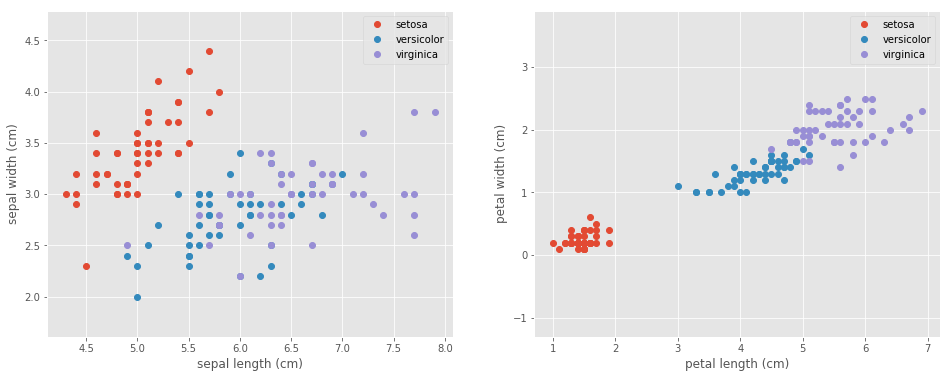

In [20]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

## nn declaration

In [21]:
#neural network
#4 inputs -> [8 hidden nodes] -> 3 outputs
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [22]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

## evaluation

In [23]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 95.33% (5.21%)


## prediction

In [36]:
myModel = baseline_model()
myModel.fit(X, Y, epochs=100, verbose=0)

In [51]:
YPredicted = myModel.predict_classes(X)
#for i in range(len(X)):
#	print("X=%s, Predicted=%s, Original=%s" % (X[i], ynew[i], dummy_y[i]))

print("X=%s, Predicted=%s, Original=%s" % (X[1], YPredicted[1], numpy.argmax(Y[1])))
print("X=%s, Predicted=%s, Original=%s" % (X[2], YPredicted[2], numpy.argmax(Y[2])))

X=[4.9 3.  1.4 0.2], Predicted=0, Original=0
X=[4.7 3.2 1.3 0.2], Predicted=0, Original=0


In [41]:
Xnew = numpy.asmatrix([4.9,3.,1.4,0.2]) # Y originl [1. 0. 0.]
Ynew = myModel.predict_classes(Xnew)
print(Ynew, Y[1])

[0] [1. 0. 0.]


In [42]:
Xnew = numpy.array([[4.9,3.,1.4,0.2], [4.7,3.2,1.3,0.2]], numpy.float)
Ynew = myModel.predict_classes(Xnew)
print(Ynew, Y[1], Y[2])

[0 0] [1. 0. 0.] [1. 0. 0.]


In [79]:
from sklearn.metrics import confusion_matrix

YOriginal = []
for i in Y:
    YOriginal.append(numpy.argmax(i))

print(confusion_matrix(numpy.asarray(YOriginal), YPredicted))

[[50  0  0]
 [ 0 42  8]
 [ 0  4 46]]
